## IMPORT LIBRARIES

In [1]:
!pip install diagrams
from diagrams import Diagram, Cluster, Edge
from diagrams.programming.language import Python
from diagrams.custom import Custom
from diagrams.aws.storage import S3
from diagrams.aws.network import ELB
from diagrams.aws.compute import EC2
from diagrams.saas.analytics import Snowflake
from diagrams.onprem.workflow import Airflow
from diagrams.programming.framework import FastAPI
from urllib.request import urlretrieve
from diagrams.digitalocean.compute import Docker
from diagrams.onprem.database import Mongodb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 20.6 MB/s eta 0:00:00



Architecture Diagram' size too small for label

Architecture Diagram' size too small for label

Architecture Diagram' size too small for label


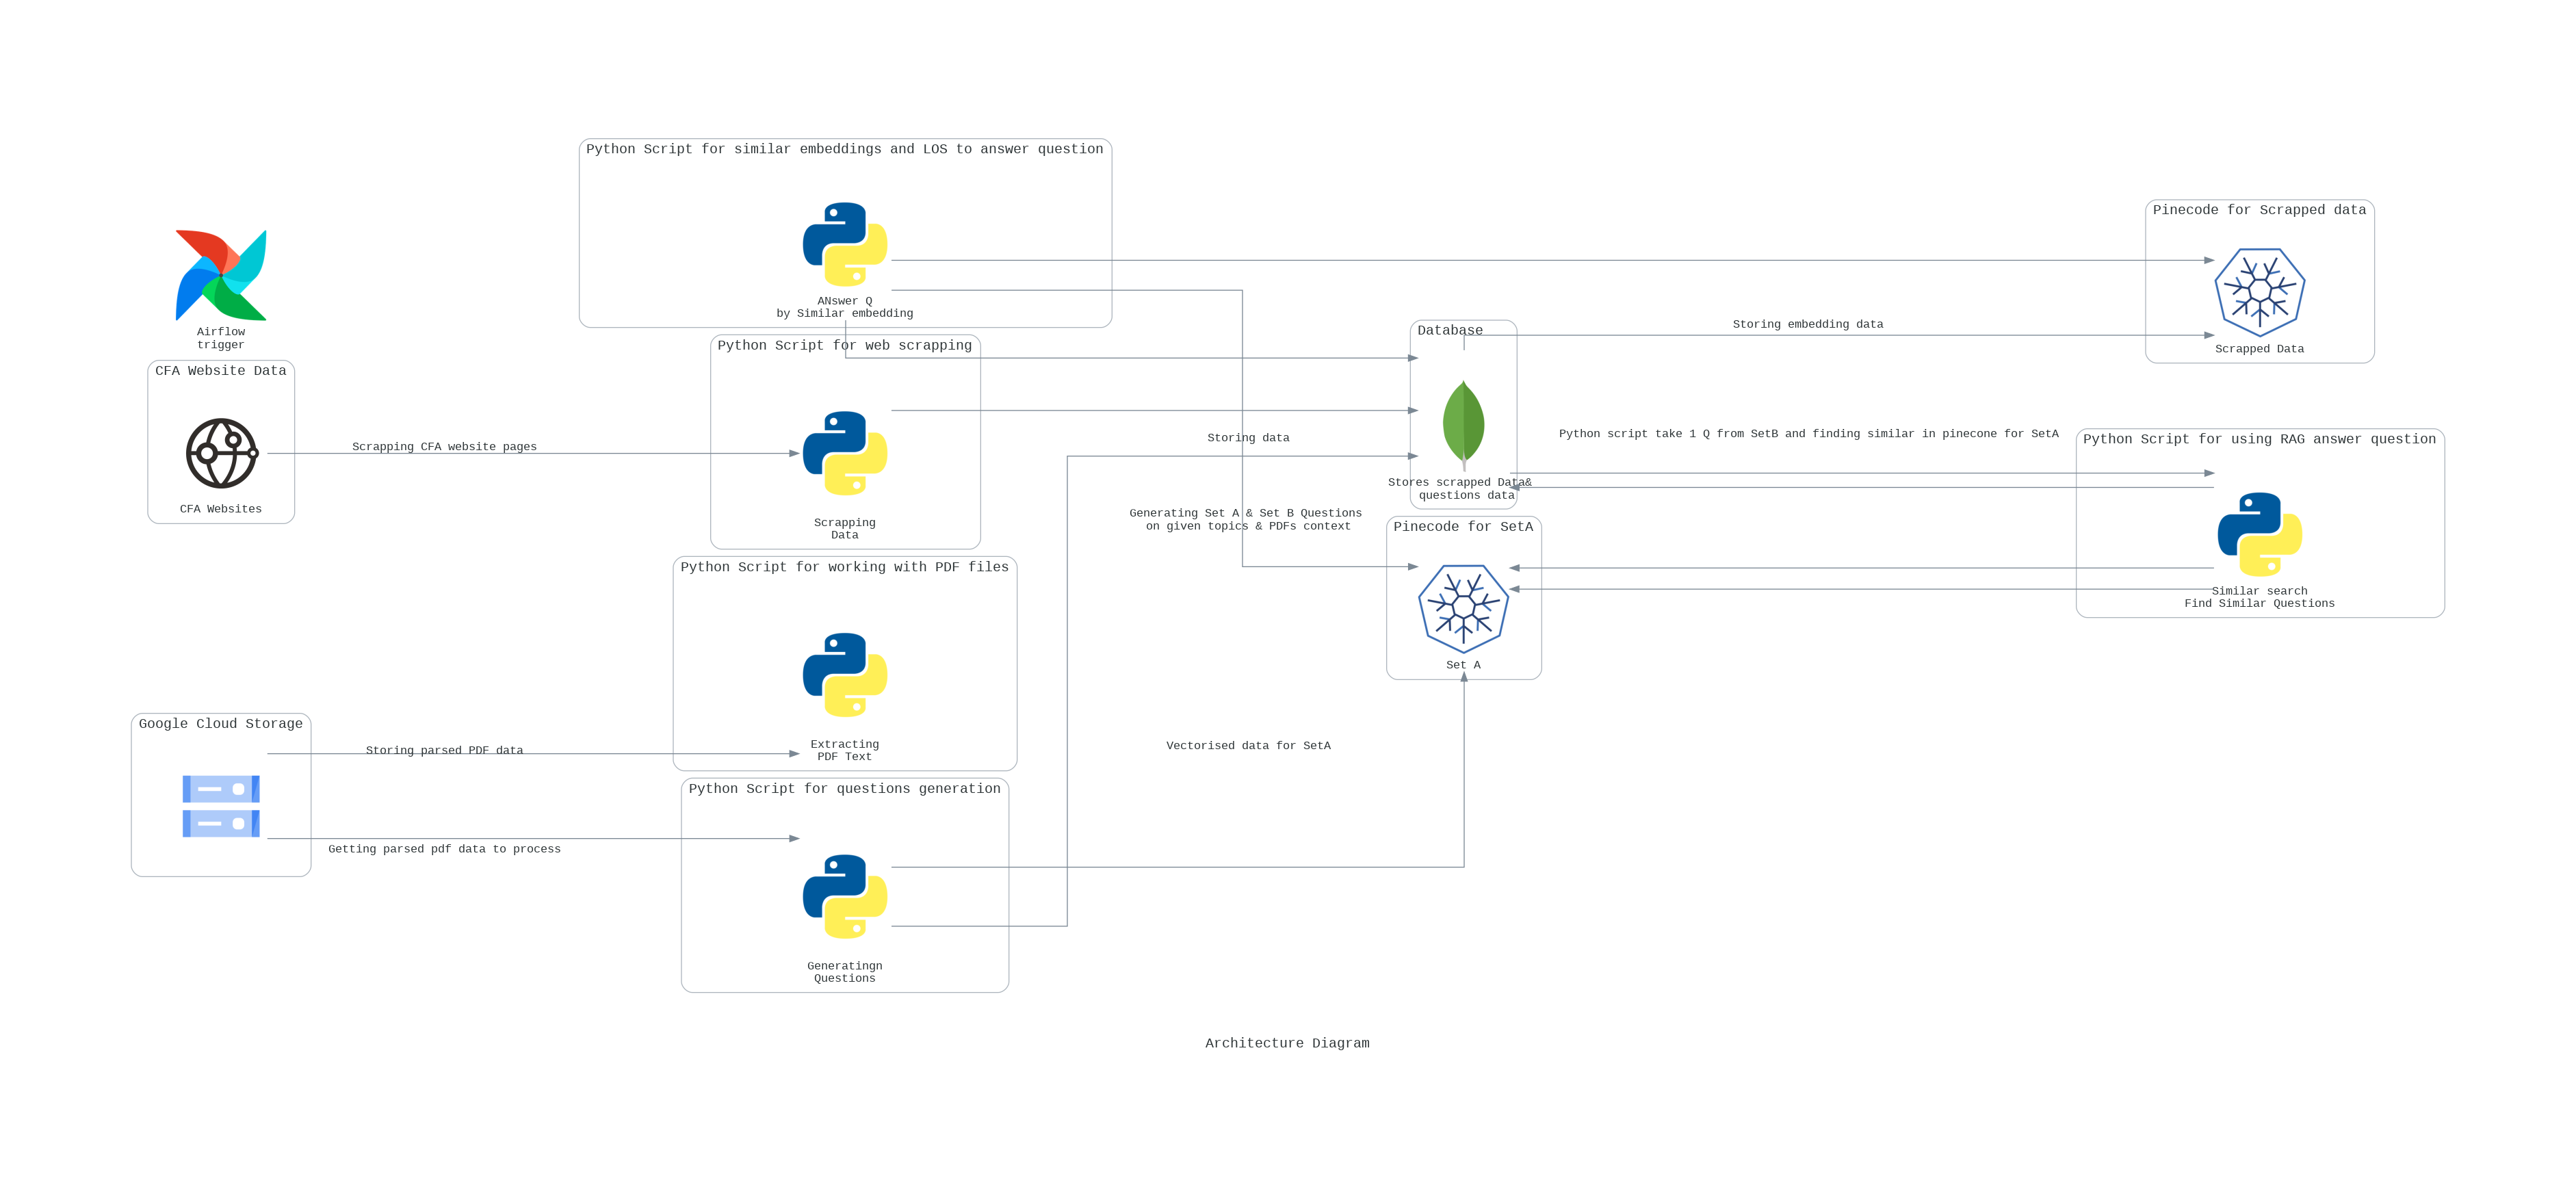

In [39]:
from diagrams import Diagram, Cluster
from diagrams.programming.language import Python
from diagrams.gcp.storage import GCS
from diagrams.onprem.container import Crio

from diagrams import Diagram, Cluster, Edge
from diagrams.aws.storage import SimpleStorageServiceS3
from diagrams import Cluster, Diagram
from diagrams.programming.language import Python
from urllib.request import urlretrieve
from diagrams.custom import Custom
from diagrams.digitalocean.storage import Folder
from diagrams.oci.connectivity import DNS
from diagrams.elastic.beats import Filebeat


graph_attr = {
  "width": "700",
  "height": "700"}

cluster_attr = {
    "bgcolor": "white",
    "fontsize":"15"
}

with Diagram("\n\nArchitecture Diagram", show=False, graph_attr=graph_attr, direction="LR") as diag:
      with Cluster("Database", graph_attr=cluster_attr):
        mongodb = Mongodb("Stores scrapped Data& \n questions data")



      with Cluster("Python Script for web scrapping", graph_attr=cluster_attr):
        web_scrapped = Python("\nScrapping\nData")

      with Cluster("Python Script for working with PDF files", graph_attr=cluster_attr):
        py_pdf_extraction = Python("\nExtracting\nPDF Text")

      with Cluster("Python Script for questions generation", graph_attr=cluster_attr):
        Questions_generation = Python("\nGeneratingn\nQuestions")

      with Cluster("Python Script for using RAG answer question", graph_attr=cluster_attr):
        SimilarQfind = Python("\Similar search\nFind Similar Questions")

      with Cluster("Python Script for similar embeddings and LOS to answer question", graph_attr=cluster_attr):
        similar_embedding = Python("\ANswer Q\nby Similar embedding")


      with Cluster("Google Cloud Storage", graph_attr=cluster_attr):
        storage = GCS("")

      # with Cluster("Airflow", graph_attr=cluster_attr):
      airflow = Airflow("Airflow\ntrigger")

      with Cluster("CFA Website Data", graph_attr=cluster_attr):
        cfa_website = DNS("CFA Websites")


      with Cluster("Pinecode for Scrapped data", graph_attr=cluster_attr):
        pinecone1 = Crio("Scrapped Data")

      with Cluster("Pinecode for SetA", graph_attr=cluster_attr):
        pinecone2 = Crio("Set A")

cfa_website >> Edge(label = "Scrapping CFA website pages") >> web_scrapped >> Edge(label = "Storing data") >> mongodb
storage >> Edge(label = "Storing parsed PDF data") >> py_pdf_extraction >> Edge(label = "Storing data")
storage >> Edge(label = "Getting parsed pdf data to process") >> Questions_generation >> Edge(label = "Generating Set A & Set B Questions \non given topics & PDFs context") >> mongodb
mongodb >> Edge(label = "Storing embedding data") >> pinecone1
Questions_generation >> Edge(label = "Vectorised data for SetA") >> pinecone2
mongodb << Edge(label = "Python script take 1 Q from SetB and finding similar in pinecone for SetA") << SimilarQfind
mongodb >> SimilarQfind
pinecone2 << SimilarQfind >> pinecone2

similar_embedding >> mongodb
similar_embedding >> pinecone2

similar_embedding >> pinecone1

diag